# Sanity check of det_rnn

+ (Warning) For some naming problems, the following may not be replicated...

In [1]:
import os, copy, pickle
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
os.chdir("D:\proj\det_rnn")
basedir ="D:\proj\det_rnn"

from det_rnn import *

In [2]:
def make_var_dict_figure(model):

    fig = plt.figure(figsize=(9.5, 12))

    ax1 = plt.subplot2grid((8,6), (0,1), rowspan=2,colspan=4); ax1.set_title("w_out")
    ax2 = plt.subplot2grid((8,6), (0,5), rowspan=2,colspan=1); ax2.set_title("b_out")
    ax3 = plt.subplot2grid((8,6), (2,0), rowspan=4,colspan=1); ax3.set_title("h")
    ax4 = plt.subplot2grid((8,6), (2,1), rowspan=4,colspan=4); ax4.set_title("w_rnn")
    ax5 = plt.subplot2grid((8,6), (2,5), rowspan=4,colspan=1); ax5.set_title("b_rnn")
    ax6 = plt.subplot2grid((8,6), (6,1), rowspan=2,colspan=4); ax6.set_title("w_in")

    im1 = ax1.imshow(model.var_dict['w_out'].numpy().T, aspect='auto')
    im2 = ax2.imshow(model.var_dict['b_out'].numpy().reshape((-1,1)), aspect='auto')
    im3 = ax3.imshow(model.var_dict['h'].numpy().T, aspect='auto')
    im4 = ax4.imshow(model.var_dict['w_rnn'].numpy(), aspect='auto')
    im5 = ax5.imshow(model.var_dict['b_rnn'].numpy().reshape((-1,1)), aspect='auto')
    im6 = ax6.imshow(model.var_dict['w_in'].numpy(), aspect='auto')

    cbarax1 = fig.add_axes([1.10, 6/8, 0.01, 2/8])
    cbarax2 = fig.add_axes([1.15, 6/8, 0.01, 2/8])
    cbarax3 = fig.add_axes([1.10, 3/8, 0.01, 2/8])
    cbarax4 = fig.add_axes([1.15, 3/8, 0.01, 2/8])
    cbarax5 = fig.add_axes([1.20, 3/8, 0.01, 2/8])
    cbarax6 = fig.add_axes([1.15, 0, 0.01, 2/8])

    fig.colorbar(im1, cax=cbarax1)
    fig.colorbar(im2, cax=cbarax2)
    fig.colorbar(im3, cax=cbarax3)
    fig.colorbar(im4, cax=cbarax4)
    fig.colorbar(im5, cax=cbarax5)
    fig.colorbar(im6, cax=cbarax6)

    plt.tight_layout()
    plt.show()

### Load data & plot

In [9]:
filename = os.path.join(basedir,'output','model_200522')
model = pickle.load(open(filename, 'rb'))
    
par['resp_decoding'] = 'conti'
par = update_parameters(par)

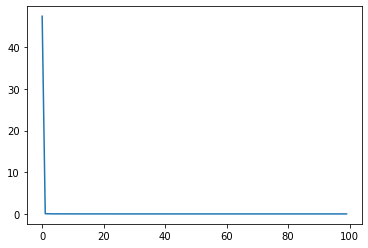

In [10]:
plt.plot(model.model_performance['iteration'],
         model.model_performance['perf_loss'])
plt.show()

C:\Users\joshr\anaconda3\envs\detrnn\lib\site-packages\ipykernel_launcher.py:33: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


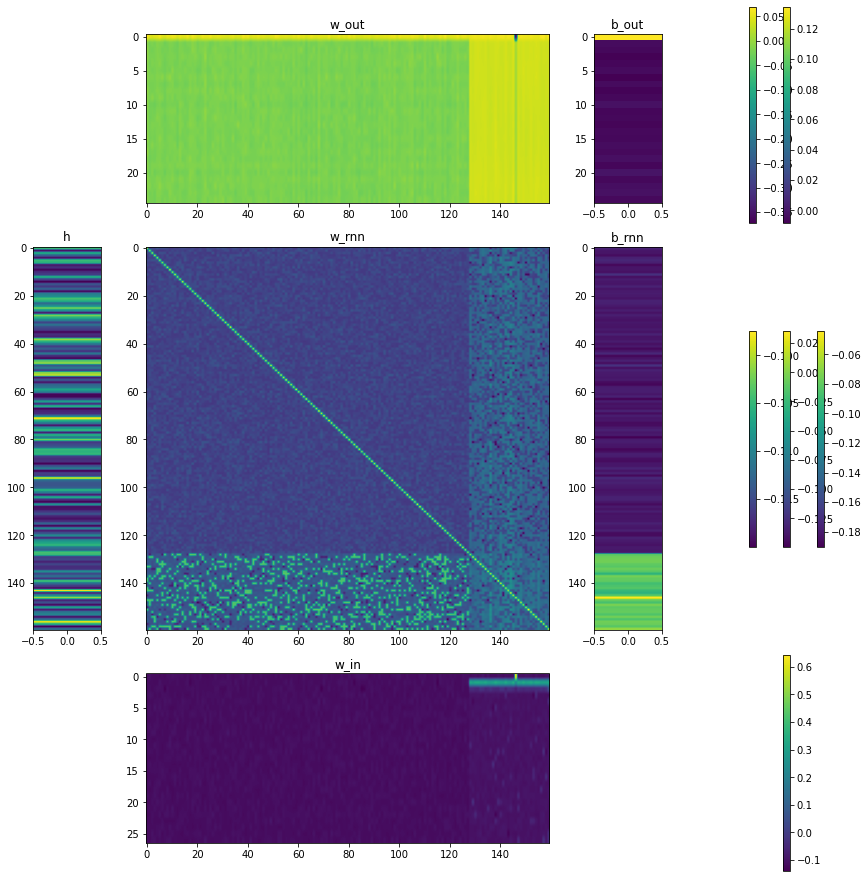

In [11]:
make_var_dict_figure(model)

In [12]:
stimulus = Stimulus()
trial_info = stimulus.generate_trial()
pred_output = model.rnn_model(trial_info['neural_input'])

InvalidArgumentError: Matrix size-incompatible: In[0]: [1024,26], In[1]: [27,160] [Op:MatMul]

In [ ]:
fig, axes = plt.subplots(3,1, figsize=(8,12))
TEST_TRIAL = np.random.randint(model.n_iterations)
axes[0].imshow(trial_info['neural_input'][:,TEST_TRIAL,:].T, aspect='auto'); axes[0].set_title("Neural Input")
if par['resp_decoding'] == 'conti':
    axes[1].plot(trial_info['desired_output'][:,TEST_TRIAL,:]); axes[1].set_ylim([-np.pi,np.pi]); axes[1].set_title("Desired Output")
    axes[2].plot(pred_output[0].numpy()[:,TEST_TRIAL,:]); axes[2].set_ylim([-np.pi,np.pi]); axes[2].set_title("Predicted output")
elif par['resp_decoding'] == 'disc':
    axes[1].imshow(trial_info['desired_output'][:,TEST_TRIAL,:].T, aspect='auto'); axes[1].set_title("Desired Output")
    axes[2].imshow(pred_output[0].numpy()[:,TEST_TRIAL,:].T, aspect='auto'); axes[2].set_title("Predicted output")    
plt.show()